## Introduction


In this project I will apply regression techniques of supervised learning to predict the medical insurance costs. 
In regression, learning algorithms maps the input data to continuous output like weight, cost, etc.
Supervised machine learning algorithms seek to approximate the unknown underlying mapping function for the output variables given the input variables.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('insurance.csv')

print (data.info())
print (data.head(5))
print ('-'*90)
print ("Successfully imported Insurance data. Data has {} data points with {} variables each.".format(*data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
------------------------------------------------------------------------------------------


Check for missing value

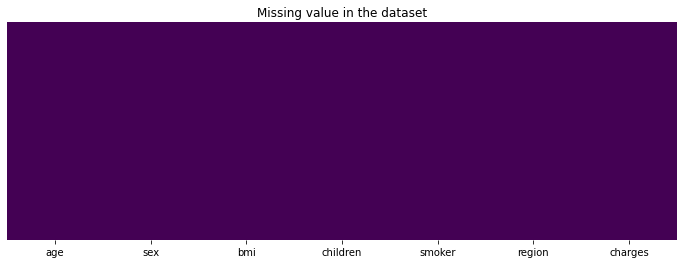

In [2]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');


There is no missing value in the data set

## Data Exploration
Dataset consists of 1338 records. Each record contains the below data for specific person.
- age – Age of the person
- sex – Sex of the person
- bmi – Body Mass Index(BMI) of the person
- children – Number of children for the person
- smoker – Smoking status of the person
- region – Region of the person in US
- charges – Medical Insurance costs per year for the person

Turning Age, BMI into Categorical Variables

In [3]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]
    
data['cbmi'] = data['bmi'].apply(lambda x: "none")
data['cage'] = data['age'].apply(lambda x: "none")

for idx, row in data.iterrows():
    data.at[idx, 'cage'] = age_category(row['age'])
    data.at[idx, 'cbmi'] = bmi_category(row['bmi'])
    
by_age = data.groupby(by='cage').size()
print (by_age)
print ('-'*80)

by_sex = data.groupby(by='sex').size()
print (by_sex)
print ('-'*80)

by_smoker = data.groupby(by='smoker').size()
print (by_smoker)
print ('-'*80)

by_region = data.groupby(by='region').size()
print (by_region)
print ('-'*80)

by_children = data.groupby(by='children').size()
print (by_children)
print ('-'*80)

by_bmi = data.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

cage
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------------------------------------------------------------------
sex
female    662
male      676
dtype: int64
--------------------------------------------------------------------------------
smoker
no     1064
yes     274
dtype: int64
--------------------------------------------------------------------------------
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64
--------------------------------------------------------------------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
--------------------------------------------------------------------------------
cbmi
normal-weight    222
obese            705
over-weight      380
under-weight      20
dtype: int64
--------------------------------------------------------------------------------


In [4]:
data

,age,sex,bmi,children,smoker,region,charges,cbmi,cage
0,19,female,27.900,0,yes,southwest,16884.92400,over-weight,10-19
1,18,male,33.770,1,no,southeast,1725.55230,obese,10-19
2,28,male,33.000,3,no,southeast,4449.46200,obese,20-29
3,33,male,22.705,0,no,northwest,21984.47061,normal-weight,30-39
4,32,male,28.880,0,no,northwest,3866.85520,over-weight,30-39
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese,50-59
1334,18,female,31.920,0,no,northeast,2205.98080,obese,10-19
1335,18,female,36.850,0,no,southeast,1629.83350,obese,10-19
1336,21,female,25.800,0,no,southwest,2007.94500,over-weight,20-29


To understand correlation between the input or the independent variables, I classified the ages and BMI into specific categories. 
The above analysis shows the stats like number of male and female, smokers and non-smokers, etc. from the input data.  
Taking the BMI ranges from Medline Plus, I categorized the input samples into `below-weight`, `normal-weight`, `over-weight` and `obese`.

From the above data we can observe below
- Input data contains an even distribution of male and female samples
- Majority of them are non-smokers with 1064 samples
- Majority of the samples are in age groups 20-29 and 40- 49 with the numbers 280 and 279 respectively.
- A major sample of input data contains persons with no children with 574.
- The data is evenly distributed across 4 regions with the region of `southeast` having slightly more samples.
- Majority the sample fall under the category of `obese`

Data distribution analysys


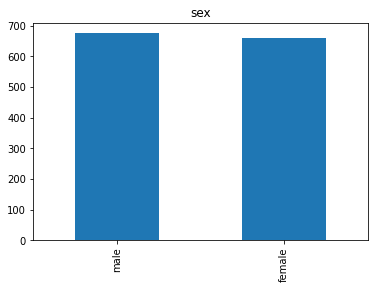

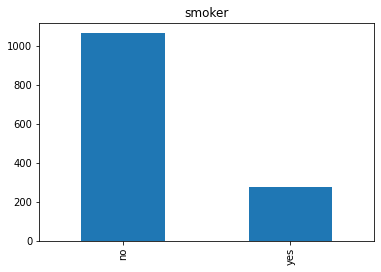

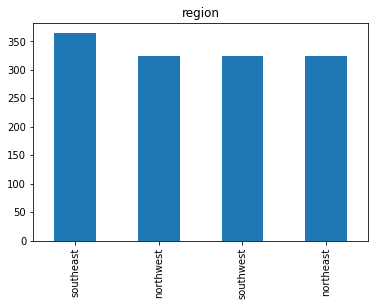

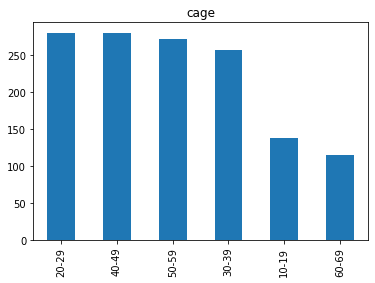

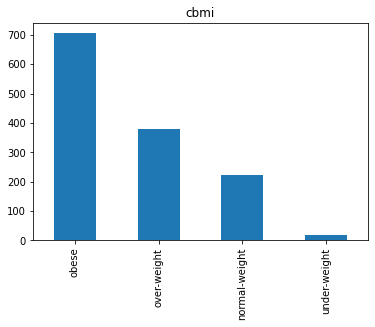

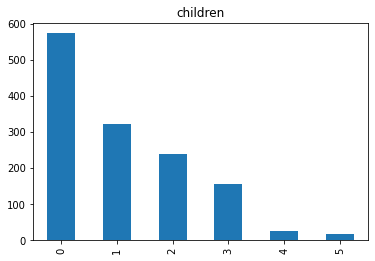

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

variables = ['sex','smoker','region','cage','cbmi','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean cost analysys:


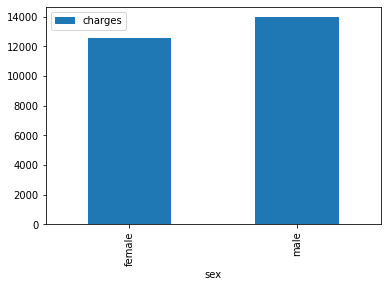

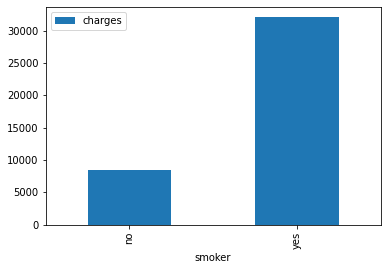

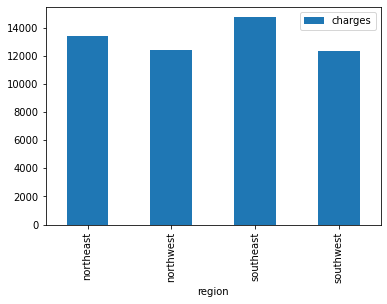

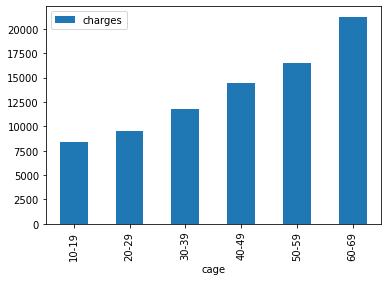

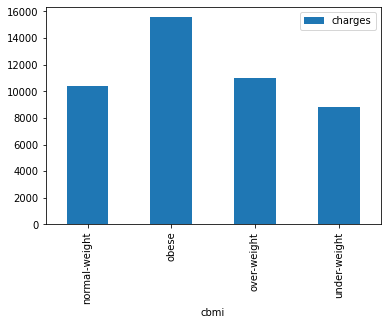

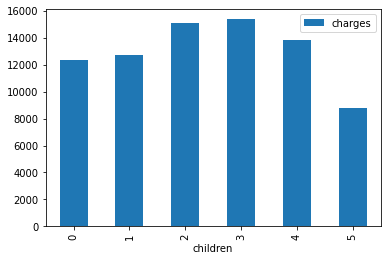

In [6]:
print('Mean cost analysys:')
for v in variables:
    group_df = data.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

From the above bar graphs, we can deduce the below facts.
- Insurance costs are higher among male population
- Insurance costs are highest among the population of age groups 60-69.
- Insurance costs increases among the smokers
- Insurance costs increases among the obese population
- Insurance costs are higher among the population in southwest region
- Surprisingly, insurance costs are higher among the individuals with 2 or 3 children rather than with individuals with 4 or 5 children.


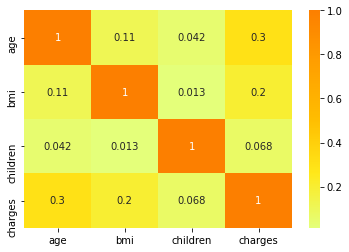

In [7]:
# correlation plot
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);


There no correlation among valiables.

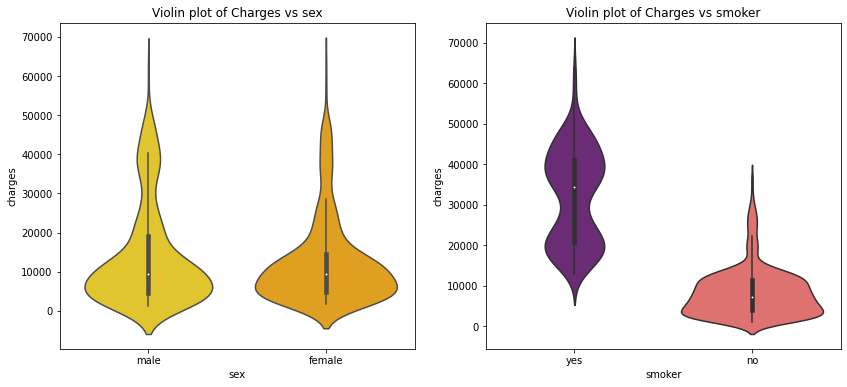

In [8]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=data,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=data,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');


From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

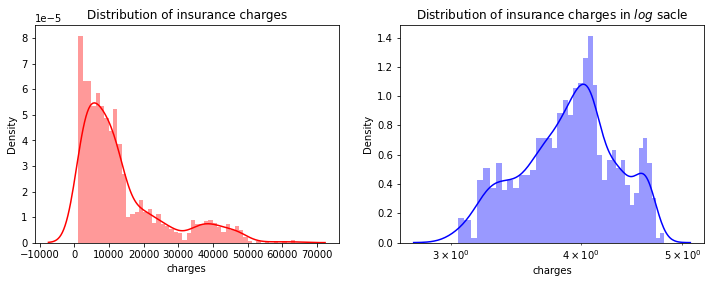

In [9]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(data['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.

### Implementation: Calculate Statistics
I explored the descriptive statistics about the insurance costs.

In [10]:
target = data['charges']
min_cost = np.min(target)
max_cost = np.max(target)
mean_cost = np.mean(target)
median_cost = np.median(target)
std_cost = np.std(target)

print (target.describe())
print ('-'*90)
# calculated statistics
print ("Statistics for Medical Insurance dataset:\n")
print ("Minimum insurance cost: ${:,.2f}".format(min_cost))
print ("Maximum insurance acost: ${:,.2f}".format(max_cost))
print ("Mean insurance cost: ${:,.2f}".format(mean_cost))
print ("Median insurance cost ${:,.2f}".format(median_cost))
print ("Standard deviation of insurance costs: ${:,.2f}".format(std_cost))

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
------------------------------------------------------------------------------------------
Statistics for Medical Insurance dataset:

Minimum insurance cost: $1,121.87
Maximum insurance acost: $63,770.43
Mean insurance cost: $13,270.42
Median insurance cost $9,382.03
Standard deviation of insurance costs: $12,105.48


### Data Preprocessing
Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

Label Encoding
One hot encoding
Dummy variable trap
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors. It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

In [11]:
data = pd.read_csv('insurance.csv')

In [13]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
data_encode = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

As we mention before we will apply log on target variable charges to transform non-normal dependent variables into a normal shape for model developing, because normality is an important assumption for many statistical techniques

In [14]:
## Log transform
data_encode['charges'] = np.log(data_encode['charges'])

In [15]:
data_encode

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,9.268661,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,7.698927,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,7.396233,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,7.604867,0,0,0,0,0,0,0,0,0,1


----

## Developing a Benchmark model: Multiple linear regression

We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature.
The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable. There are multiple independent variable, so we need to fit Multiple linear regression.

### Training and Testing


In [16]:
from sklearn.model_selection import train_test_split
X = data_encode.drop('charges',axis=1) # Independet variable
y = data_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

### Model building: Multiple linear regression

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
# Parameter
columns = ['intersect:x_0=1'] + list(X.columns.values)
coefficients = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = pd.DataFrame({'Columns':columns})
parameter_df = parameter_df.join(pd.Series(coefficients, name='coefficients'))

In [19]:
parameter_df

,Columns,coefficients
0,intersect:x_0=1,7.052768
1,age,0.033265
2,bmi,0.013865
3,OHE_male,-0.067809
4,OHE_1,0.142511
5,OHE_2,0.278529
6,OHE_3,0.254834
7,OHE_4,0.500875
8,OHE_5,0.421956
9,OHE_yes,1.550229


### Implementation: Define a Performance Metric

- Coefficient of determination 


This metric is denoted by $R^2$ and also called are “R squared”. R-squared is a statistical measure of how close the data are to the fitted regression line. This metric calculates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


- Mean Square Error 



In [20]:
# sklearn regression module
y_pred_based_model = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse_based_model = mean_squared_error(y_pred_based_model, y_test)

# r2_score
from sklearn.metrics import r2_score
r2_score_based_model = r2_score(y_pred_based_model, y_test)
print ("mean_squared_error for Benchmark modell: {:4f}".format(mse_based_model))
print ("r2_score for Benchmark model: {:4f}".format(r2_score_based_model))

mean_squared_error for Benchmark modell: 0.176738
r2_score for Benchmark model: 0.720236


----

## Machine learning model

The Benchmark model returns $R^2$ value of 72%, so it fit our data test well, but still we can imporve the the performance of by diffirent technique. We will implement the other regression machine learning models discussed in the lectures and try to get a better result compared to our Benchmark model.

In [21]:

def train_predict_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse_ = mean_squared_error(y_pred, y_test)
    r2_score_ = r2_score(y_pred, y_test)
    return np.array([mse_, r2_score_])
    
    

In [22]:
from sklearn.svm import SVR # Support Vector Machine 
from sklearn.neighbors import KNeighborsRegressor  #Regression based on k-nearest neighbors.
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor 



result_data = np.empty([5, 2])
clf_based = LinearRegression()
clf_a = DecisionTreeRegressor(random_state=1)
clf_b = RandomForestRegressor(random_state = 42)
clf_c = SVR()
clf_d = KNeighborsRegressor()  
row_name_lst = ['Linear Regression','Decision Tree Regressor', 'Random Forest Regressor','Support Vector Machine', 'k-nearest neighbors']
col_name_lst = ['mse', 'r2_score']
clf_lst = (clf_based, clf_a, clf_b, clf_c, clf_d)
for i in range(len(clf_lst)) :
    result_data[i,:] = train_predict_model(clf_lst[i],  X_train, y_train, X_test, y_test)
result_df = pd.DataFrame(result_data, columns= col_name_lst, index = row_name_lst)
result_df

,mse,r2_score
Linear Regression,0.176738,0.720236
Decision Tree Regressor,0.403980,0.546127
Random Forest Regressor,0.157851,0.797028
Support Vector Machine,0.553735,-0.521767
k-nearest neighbors,0.499407,-0.177502


Multiple regression algorithms like Linear Regression(Benchmark model), decision trees, random forest, Support Vector Machines, k-nearest neighbors for regression are considered and compared based on the metrics.


As we can see from the result table, Random Forest Regressor (mse: 15,78% and r2_score: 79,7%) has the best performance among these algorithms and this is a significant improvement compared to our benchmark model linear regression ((mse: 17,67% and r2_score: 72.02%). 

A random forest is an ensemble model that consists of many decision trees. Predictions are made by averaging the predictions of each decision tree. Or, to extend the analogy—much like a forest is a collection of trees, the random forest model is also a collection of decision tree models. This makes random forests a strong modeling technique that’s much more powerful than a single decision tree.


In this case, the random forest regression algorithm can be more suitable for  this regression problem than other common and popular algorithms because 

- There are non-linear or complex relationships between features and labels.
- The random forest algorithm is more robust than a single decision tree, as it uses a set of uncorrelated decision trees.
- Random forest is a good choice to avoid overfitting.


 

### So I choose to use random forest technique for this project and focus on optimizing the random forest model. 
 
 In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training).
 
 The standard procedure for hyperparameter optimization accounts for overfitting through cross validation.
 
 Look at parameters used by our current forest

In [23]:
rf = clf_b
from pprint import pprint


print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### The most important settings are 
- the number of trees in the forest (n_estimators) 
- the number of features considered for splitting at each leaf node (max_features)


We will try adjusting the following set of hyperparameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

### Create a parameter grid to sample from during fitting to use RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1800, stop = 2200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(70, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [16, 18, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [16, 18, 20],
 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


On each iteration, the algorithm will choose a difference combination of the features. The benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values. 
### Random Search Training
 Use the random grid to search for best hyperparameters. Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores


In [25]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [16, 18, 20],
                                        'n_estimators': [1800, 1900, 2000, 2100,
                                                         2200]},
                   random_state=42, verbose=2)

In [27]:
best_random = rf_random.best_estimator_
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [28]:
random_search_training_mse,random_search_training_r2_score = train_predict_model(best_random,
                                                                                 X_train, y_train, X_test, y_test)

In [29]:
print ("mean_squared_error for Random Search Training modell: {:4f}".format(random_search_training_mse))
print ("r2_score for Random Search Training model: {:4f}".format(random_search_training_r2_score))

mean_squared_error for Random Search Training modell: 0.137425
r2_score for Random Search Training model: 0.814133


as we see, the random grid does help us to search for the better hyperparameters and the result is improved (mse: 13,74% and r2_score: 81,41%) in compare to the result before (mse: 15,78% and r2_score: 79,7%)

# Grid Search with Cross Validation
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.
Create the parameter grid based on the results of random search.

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [21, 25, 27],
    'n_estimators': [ 1950, 2000, 2100]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [32]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 21,
 'n_estimators': 2000}

In [33]:
best_grid = grid_search.best_estimator_
grid_mse, grid_r2_score = train_predict_model(best_grid,  X_train, y_train, X_test, y_test)

In [34]:
print ("mean_squared_error for GridSearchCV modell: {:4f}".format(grid_mse))
print ("r2_score for GridSearchCV model: {:4f}".format(grid_r2_score))

mean_squared_error for GridSearchCV modell: 0.137330
r2_score for GridSearchCV model: 0.814193


As we can see, the grid search with cross-validation does not significantly improve our result, but there is still a slightly better result in mse. 
# Plot the result 

In [41]:
def plot_result(true_value, predicted_value):
    plt.figure(figsize=(10,10))
    plt.scatter(true_value, predicted_value, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()


### the benchmark model

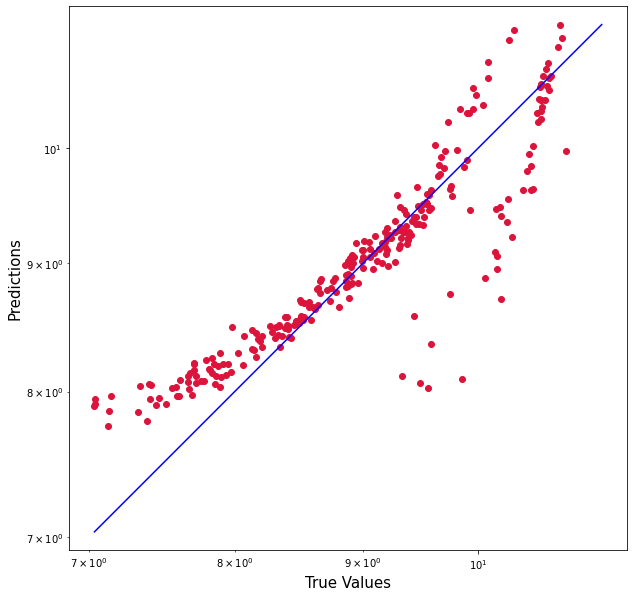

In [43]:
plot_result(true_value, clf_based.predict(X_test))

### Our final ML model

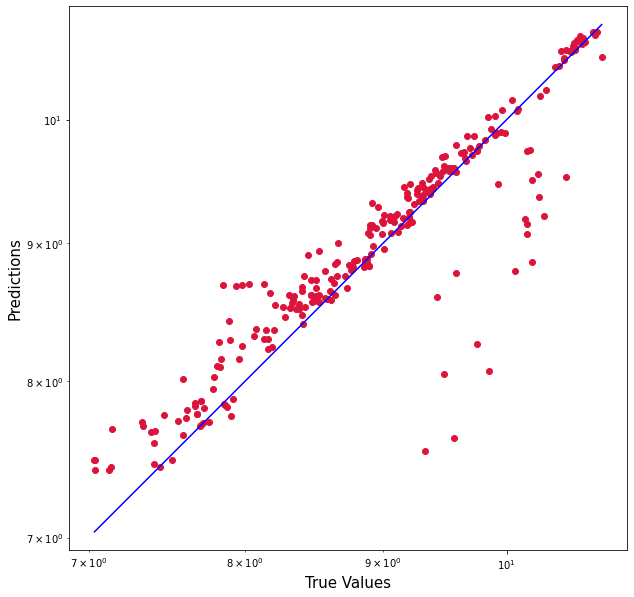

In [44]:
plot_result(true_value, best_grid.predict(X_test))



It is quite clear that our machine learning model performs much better than the benchmark model.  Nevertheless, we were able to improve our model significantly with hyperparameter tuning and feature engineering. 



